In [156]:
from PIL import Image
import matplotlib.pyplot as plt

In [157]:
# initialising constants
photos_directory = "../resources/test_photos"
LOGO_PATH = "../resources/NuIEEE_logos"
BRANDED_PHOTOS_DIRECTORY = "../brandified_photos"

In [158]:
# define logo dimensions
logo_path_blue = LOGO_PATH + "/" + "NuIEEE_logo_blue.png"
logo_template = Image.open(logo_path_blue)
logo_template = logo_template.convert("RGBA")
logo_width = int(1.5 * logo_template.size[0])
logo_height = int((logo_width / logo_template.size[0]) * logo_template.size[1])
logo_displacement_x = int(logo_width/2)
logo_displacement_y = int(logo_height*3/4)
logo_template = logo_template.resize((logo_width, logo_height), Image.LANCZOS)

In [159]:
import math

def test_position(photo, x, y):
    region = photo.crop((x, y, x + logo_width, y + logo_height))
    region = region.convert("RGB")
    region_data = region.getdata()
    #plt.imshow(region)
    #plt.axis('off')
    #plt.show()

    pixel_count = 0

    brightness_sum = 0
    for pixel in region_data:
        r, g, b = pixel[:3]
        brightness = (r + g + b) / 3
        brightness_sum += brightness
        pixel_count += 1
        average_brightness = brightness_sum / pixel_count

    pixel_count = 0
    brightness_sum = 0
    red_sum = 0
    green_sum = 0
    blue_sum = 0

    for pixel in region_data:
        r, g, b = pixel[:3]
        brightness = (r + g + b) / 3
        brightness_sum += brightness
        red_sum += r
        green_sum += g
        blue_sum += b
        pixel_count += 1

    average_brightness = brightness_sum / pixel_count
    average_red = red_sum / pixel_count
    average_green = green_sum / pixel_count
    average_blue = blue_sum / pixel_count

    brightness_variance = 0
    red_variance = 0
    green_variance = 0
    blue_variance = 0

    for pixel in region_data:
        r, g, b = pixel[:3]
        brightness_variance += (brightness - average_brightness) ** 2
        red_variance += (r - average_red) ** 2
        green_variance += (g - average_green) ** 2
        blue_variance += (b - average_blue) ** 2

    brightness_stddev = math.sqrt(brightness_variance / pixel_count)
    #red_stddev = math.sqrt(red_variance / pixel_count)
    #green_stddev = math.sqrt(green_variance / pixel_count)
    blue_stddev = math.sqrt(blue_variance / pixel_count)

    # resizing photo for analysis
    photo = photo.resize((int(photo.width/6), int(photo.height/6)), Image.LANCZOS)
    photo = photo.convert("RGB")

    blue_sum = 0
    photo_data = photo.getdata()
    for pixel in photo_data:
        r, g, b = pixel[:3]
        blue = (r/2 + g/2 + b*2) / 3
        blue_sum += blue
        pixel_count += 1
        average_blue = blue_sum / pixel_count
        
    darkblue_sum = 0
    photo_data = photo.getdata()
    for pixel in photo_data:
        r, g, b = pixel[:3]
        darkblue = b
        darkblue_sum += darkblue
        pixel_count += 1
        average_darkblue = darkblue_sum / pixel_count

    white_score = int((255*100)/(1 + average_brightness) - brightness_stddev*5)
    black_score = int((average_brightness*7/255) * 100 - brightness_stddev*5)
    blue_score = int((average_blue*15/255) * 100 + (average_brightness*2/255) * 100 - brightness_stddev*4 - blue_stddev*2)
    darkblue_score = int((average_darkblue*13/255) * 100 + (average_brightness*5/255) * 100 - brightness_stddev*4 - blue_stddev*2)

    return {
        "white": white_score,
        "black": black_score,
        "blue": blue_score,
        "darkblue": darkblue_score
    } 

In [160]:
# gets all possible positions
def possible_positions(photo):
    # upper-left corner
    x_ul = int(logo_displacement_x - logo_width/8)
    y_ul = int(logo_displacement_y)
    ul = (x_ul, y_ul)

    # upper-right corner
    x_ur = int(photo.width - logo_width - logo_displacement_x)
    y_ur = int(logo_displacement_y)
    ur = (x_ur, y_ur)

    # bottom-left corner
    x_bl = int(logo_displacement_x - logo_width/8)
    y_bl = int(photo.height - logo_height - logo_displacement_y)
    bl = (x_bl, y_bl)

    # bottom-right corner
    x_br = int(photo.width - logo_width - logo_displacement_x)
    y_br = int(photo.height - logo_height - logo_displacement_y)
    br = (x_br, y_br)

    # bottom-center alignment
    x_bc = int(photo.width/2 - logo_width/2 - logo_displacement_x/4)
    y_bc = int(photo.height - logo_height - logo_displacement_y)
    bc = (x_bc, y_bc)

    return [bc, ul, ur, bl, br]

In [161]:
def best_position_logo(photo):
    position_array = []
    possible_positions_array = possible_positions(photo)

    for i, position in enumerate(possible_positions_array):
        position_array.append(test_position(
            photo, 
            possible_positions_array[i][0],
            possible_positions_array[i][1]
        ))
    
    print(position_array)
    best = 0
    for index, position in enumerate(position_array):
        for color, value in position.items():
            if value > best:
                best = value
                best_index = index
                best_color = color

    return {
        'position': possible_positions_array[best_index],
        'color': best_color
    }

In [162]:
# get resized logo with given the color
def get_logo(logo_color):
    logo = Image.open(LOGO_PATH + "/" + f'NuIEEE_logo_{logo_color}.png')
    logo = logo.convert("RGBA")
    logo = logo.resize((logo_width, logo_height), Image.LANCZOS)
    return logo

In [163]:
# getting the files
import os
total_files = len(os.listdir(photos_directory))
completed_files = 0
filename_array = list(filter(lambda filename: filename.endswith(".jpg") 
                            or filename.endswith(".png") 
                            or filename.endswith(".JPG"), 
                        os.listdir(photos_directory)))
total_i = len(filename_array)
print(filename_array)

['IMG_0006.jpg', 'IMG_0010.jpg', 'IMG_8615.jpg', 'IMG_0081.JPG', 'IMG_8433.JPG', 'IMG_0009.jpg', 'IMG_8119.JPG', 'IMG_0020.JPG', 'IMG_8734.JPG']


[{'white': 302, 'black': 222, 'blue': 293, 'darkblue': 219}, {'white': 103, 'black': 271, 'blue': 362, 'darkblue': 346}, {'white': 357, 'black': 127, 'blue': 361, 'darkblue': 264}, {'white': -470, 'black': -145, 'blue': -141, 'darkblue': -109}, {'white': 176, 'black': -52, 'blue': 121, 'darkblue': 24}]


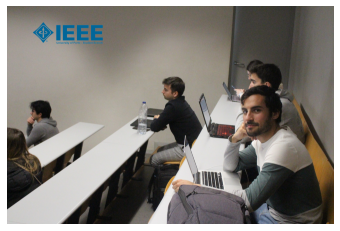

[{'white': 322, 'black': 198, 'blue': 280, 'darkblue': 232}, {'white': 98, 'black': -88, 'blue': 68, 'darkblue': 10}, {'white': 204, 'black': 249, 'blue': 255, 'darkblue': 240}, {'white': 41, 'black': 411, 'blue': 244, 'darkblue': 324}, {'white': 304, 'black': 194, 'blue': 285, 'darkblue': 239}]


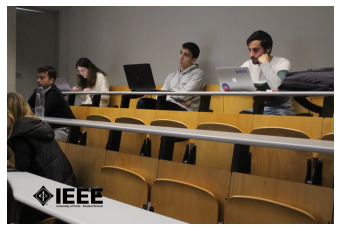

[{'white': 133, 'black': 140, 'blue': 303, 'darkblue': 225}, {'white': 76, 'black': 657, 'blue': 589, 'darkblue': 689}, {'white': 240, 'black': 109, 'blue': 330, 'darkblue': 226}, {'white': 533, 'black': 104, 'blue': 426, 'darkblue': 287}, {'white': 547, 'black': -50, 'blue': 290, 'darkblue': 139}]


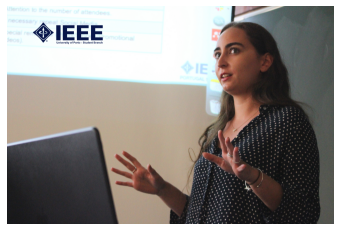

[{'white': 354, 'black': 53, 'blue': 187, 'darkblue': 133}, {'white': 90, 'black': 108, 'blue': 66, 'darkblue': 63}, {'white': 177, 'black': 15, 'blue': 74, 'darkblue': 38}, {'white': 344, 'black': 197, 'blue': 270, 'darkblue': 236}, {'white': 283, 'black': 180, 'blue': 257, 'darkblue': 230}]


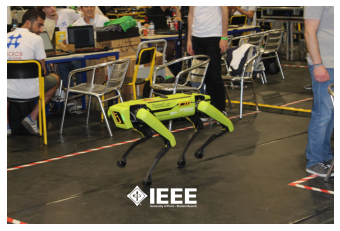

[{'white': 585, 'black': 75, 'blue': 268, 'darkblue': 181}, {'white': -6, 'black': 33, 'blue': 90, 'darkblue': 77}, {'white': 41, 'black': 215, 'blue': 235, 'darkblue': 257}, {'white': 559, 'black': 104, 'blue': 294, 'darkblue': 211}, {'white': 255, 'black': 107, 'blue': 238, 'darkblue': 190}]


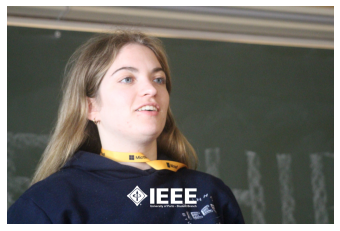

[{'white': 16, 'black': 122, 'blue': 210, 'darkblue': 167}, {'white': -36, 'black': 210, 'blue': 219, 'darkblue': 216}, {'white': 139, 'black': 259, 'blue': 327, 'darkblue': 287}, {'white': -248, 'black': -117, 'blue': 49, 'darkblue': 12}, {'white': 99, 'black': 338, 'blue': 306, 'darkblue': 301}]


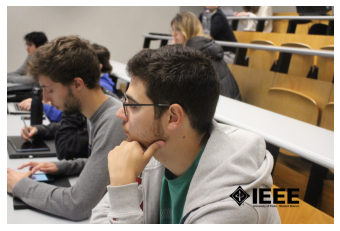

[{'white': 223, 'black': 106, 'blue': 151, 'darkblue': 83}, {'white': 106, 'black': -23, 'blue': 145, 'darkblue': 75}, {'white': 155, 'black': 295, 'blue': 375, 'darkblue': 364}, {'white': 266, 'black': 141, 'blue': 282, 'darkblue': 212}, {'white': -151, 'black': 46, 'blue': 36, 'darkblue': 41}]


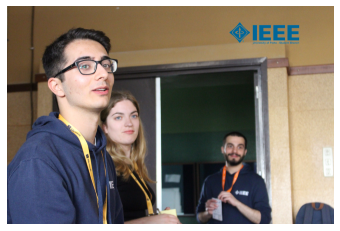

[{'white': -290, 'black': -368, 'blue': -88, 'darkblue': -174}, {'white': 121, 'black': 230, 'blue': 396, 'darkblue': 351}, {'white': -27, 'black': 176, 'blue': 254, 'darkblue': 235}, {'white': -267, 'black': -134, 'blue': 21, 'darkblue': -17}, {'white': 106, 'black': 276, 'blue': 266, 'darkblue': 238}]


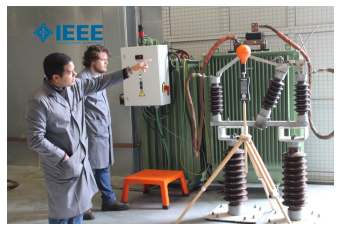

[{'white': -144, 'black': 243, 'blue': 197, 'darkblue': 255}, {'white': -212, 'black': 124, 'blue': 66, 'darkblue': 107}, {'white': 283, 'black': 240, 'blue': 346, 'darkblue': 284}, {'white': -172, 'black': -798, 'blue': -386, 'darkblue': -511}, {'white': 102, 'black': 511, 'blue': 414, 'darkblue': 480}]


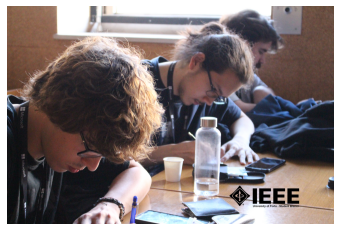

In [164]:
for filename in filename_array:
    # getting the photo
    photo_path = photos_directory + "/" + filename
    photo = Image.open(photo_path)
    photo = photo.convert("RGBA")

    # paste the logo in the right position in the photo
    best_position = best_position_logo(photo)
    position = best_position['position']
    logo_color = best_position['color']

    logo = get_logo(logo_color)
    image_with_logo = Image.new("RGBA", photo.size)
    image_with_logo.paste(photo, (0, 0))
    image_with_logo.paste(logo, position, mask=logo.split()[3])
    
    plt.imshow(image_with_logo)
    plt.axis('off')
    plt.show()
    